<a href="https://colab.research.google.com/github/Adnan4555/ADNAN-4555/blob/DATA-SCIENCE/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/Diabetes.csv")

In [ ]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.count()

,0
pregnancies,768
glucose,768
diastolic,768
triceps,768
insulin,768
bmi,768
dpf,768
age,768
diabetes,768


In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [ ]:
df.value_counts()

pregnancies  glucose  diastolic  triceps  insulin  bmi   dpf    age  diabetes
0            57       60         0        0        21.7  0.735  67   0           1
             67       76         0        0        45.3  0.194  46   0           1
5            103      108        37       0        39.2  0.305  65   0           1
             104      74         0        0        28.8  0.153  48   0           1
             105      72         29       325      36.9  0.159  28   0           1
                                                                                ..
2            84       50         23       76       30.4  0.968  21   0           1
             85       65         0        0        39.6  0.930  27   0           1
             87       0          23       0        28.9  0.773  25   0           1
                      58         16       52       32.7  0.166  25   0           1
17           163      72         41       114      40.9  0.817  47   1           1
Name: count, Length: 768, dtype: int64

In [ ]:
df.value_counts("pregnancies")

,count
pregnancies,
1,135
0,111
2,103
3,75
4,68
5,57
6,50
7,45
8,38


In [ ]:
df.value_counts("age")

,count
age,
22,72
21,63
25,48
24,46
23,38
28,35
26,33
27,32
29,29


In [ ]:
df.value_counts("triceps")

,count
triceps,
0,227
32,31
30,27
27,23
23,22
18,20
28,20
33,20
31,19


In [ ]:
df.groupby("diabetes").mean()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
diabetes,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
y = df["diabetes"]

In [ ]:
y.shape

(768,)

In [ ]:
y

,diabetes
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
x = df[['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age']]

In [ ]:
x.shape

(768, 8)

In [ ]:
x

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x1=scaler.fit_transform(x)

In [ ]:
x1

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.3,stratify=y,random_state=2529)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((537, 8), (231, 8), (537,), (231,))

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
x_test

array([[0.17647059, 0.69849246, 0.44262295, ..., 0.38152012, 0.1383433 ,
        0.01666667],
       [0.23529412, 0.57286432, 0.52459016, ..., 0.43070045, 0.0204953 ,
        0.05      ],
       [0.11764706, 0.64321608, 0.52459016, ..., 0.59612519, 0.43680615,
        0.05      ],
       ...,
       [0.17647059, 0.85427136, 0.52459016, ..., 0.51415797, 0.11870196,
        0.15      ],
       [0.23529412, 0.65829146, 0.55737705, ..., 0.49329359, 0.03501281,
        0.11666667],
       [0.35294118, 0.54773869, 0.49180328, ..., 0.37257824, 0.05465414,
        0.1       ]])

In [ ]:
y_pred = model.predict(x_test)
y_pred.shape

(231,)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
model.predict_proba(x_test)

array([[0.71103946, 0.28896054],
       [0.80270043, 0.19729957],
       [0.50024494, 0.49975506],
       [0.87453281, 0.12546719],
       [0.84327888, 0.15672112],
       [0.72976287, 0.27023713],
       [0.32533912, 0.67466088],
       [0.82925861, 0.17074139],
       [0.57780995, 0.42219005],
       [0.58037119, 0.41962881],
       [0.90526788, 0.09473212],
       [0.42445722, 0.57554278],
       [0.81675638, 0.18324362],
       [0.86059521, 0.13940479],
       [0.55621701, 0.44378299],
       [0.83246253, 0.16753747],
       [0.40586938, 0.59413062],
       [0.8432027 , 0.1567973 ],
       [0.603806  , 0.396194  ],
       [0.51914277, 0.48085723],
       [0.65191019, 0.34808981],
       [0.89681578, 0.10318422],
       [0.88362429, 0.11637571],
       [0.50440599, 0.49559401],
       [0.74028059, 0.25971941],
       [0.38055467, 0.61944533],
       [0.86757912, 0.13242088],
       [0.63021062, 0.36978938],
       [0.54630712, 0.45369288],
       [0.16759088, 0.83240912],
       [0.

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))

[[136  14]
 [ 37  44]]


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Confusion Matrix:
[[136  14]
 [ 37  44]]


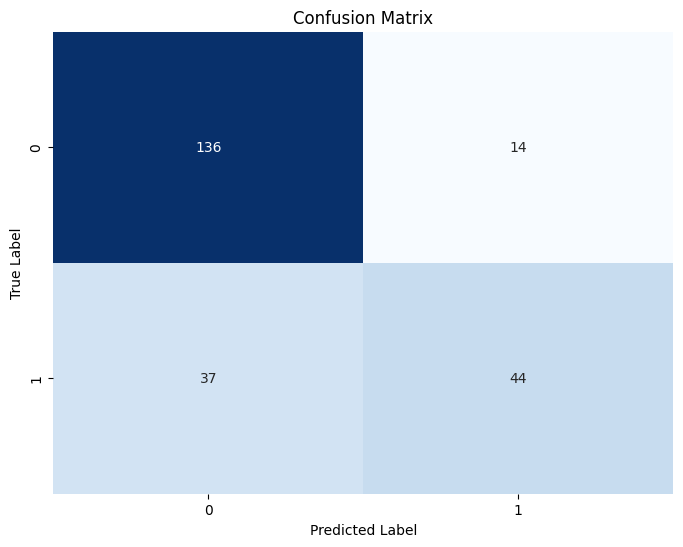

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

cmatrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cmatrix,annot=True,fmt="d",cmap="Blues",cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       150
           1       0.76      0.54      0.63        81

    accuracy                           0.78       231
   macro avg       0.77      0.72      0.74       231
weighted avg       0.78      0.78      0.77       231



In [ ]:
new = df.sample(1)

In [ ]:
new

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
647,0,179,50,36,159,37.8,0.455,22,1


In [ ]:
new.shape

(1, 9)

In [ ]:
x_new = new.drop("diabetes",axis=1)

In [ ]:
x_new.shape

(1, 8)

In [ ]:
x_new = scaler.fit_transform(x_new)
x_new

array([[0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
y_pred_new = model.predict(x_new)
y_pred_new

array([0])

In [ ]:
model.predict_proba(x_new)

array([[0.99511171, 0.00488829]])

In [ ]:
df1 = pd.read_csv("/content/heart.csv")

In [ ]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df1.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df1.shape

(303, 14)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df1.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         2
59   1    0   110       239   0    0        142      1      1.2      1      1   3     0         1
          2   126       218   1    1        134      0      2.2      1      1   1     0         1
          1   140       221   0    1        164      1      0.0      2      0   2     1         1
          0   170       326   0    0        140      1      3.4      0      0   3     0         1
                                                                                               ..
51   1    2   94        227   0    1        154      1      0.0      2      1   3     1         1
          0   140       299   0    1        173      1      1.6      2      0   3     0         1
                        298   0    1        122      1      4.2      1      3   3     0         1
                        261   0    0        186      1      0.0      2      0   2     1         1
77   1    0   125       304   0    0        162      1      0.0      2      3   2     0         1
Name: count, Length: 302, dtype: int64

In [ ]:
df.value_counts("age")

,count
age,
22,72
21,63
25,48
24,46
23,38
28,35
26,33
27,32
29,29


In [ ]:
df1.value_counts("cp")

,count
cp,
0,143
2,87
1,50
3,23


In [ ]:
df1.groupby("target").mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [ ]:
x = df1[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]]

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y = df1["target"]

In [ ]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x1=scaler.fit_transform(x1)

In [ ]:
x1

array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.25      , 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.5       , 0.25      ,
        0.66666667]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.3,stratify=y,random_state=2529)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((212, 13), (91, 13), (212,), (91,))

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred.shape

(91,)

In [ ]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0])

In [ ]:
model.predict_proba(x_test)

array([[0.90079068, 0.09920932],
       [0.33473139, 0.66526861],
       [0.93416523, 0.06583477],
       [0.06123677, 0.93876323],
       [0.76306768, 0.23693232],
       [0.98335193, 0.01664807],
       [0.70276882, 0.29723118],
       [0.17713462, 0.82286538],
       [0.34686229, 0.65313771],
       [0.32068296, 0.67931704],
       [0.96603187, 0.03396813],
       [0.08925474, 0.91074526],
       [0.81751841, 0.18248159],
       [0.62923493, 0.37076507],
       [0.15521786, 0.84478214],
       [0.52184926, 0.47815074],
       [0.92241328, 0.07758672],
       [0.8955315 , 0.1044685 ],
       [0.32698701, 0.67301299],
       [0.11502594, 0.88497406],
       [0.43998268, 0.56001732],
       [0.07016239, 0.92983761],
       [0.5186678 , 0.4813322 ],
       [0.19470473, 0.80529527],
       [0.95081379, 0.04918621],
       [0.68066762, 0.31933238],
       [0.92084884, 0.07915116],
       [0.73474919, 0.26525081],
       [0.16546393, 0.83453607],
       [0.86026704, 0.13973296],
       [0.

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))

[[34  7]
 [12 38]]


confusion matrix:
[[34  7]
 [12 38]]


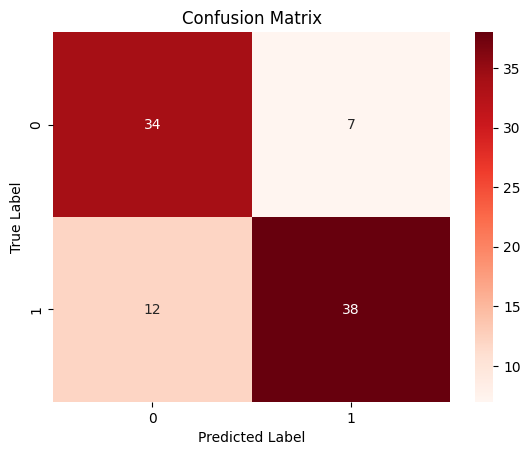

In [ ]:
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred))
cmatrix = confusion_matrix(y_test,y_pred)
plt.figure(figure=(8,6))
sns.heatmap(cmatrix,annot=True,fmt="d",cmap="Reds")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78        41
           1       0.84      0.76      0.80        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.80      0.79      0.79        91



In [ ]:
x_train_predicition = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predicition,y_train)
print("Accuracy on training data:",training_data_accuracy)

Accuracy on training data: 0.839622641509434


In [ ]:
x_test_predicition = model.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_predicition,y_test)
print("Accuracy on testing data:",testing_data_accuracy)

Accuracy on testing data: 0.7912087912087912
